In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **What does named entity recognition do?**
 **Named entity recognition is a NLP technique that can automatically scan entire articles and pull out some fundamental entities in a text and classify them into predefined categories**
 
 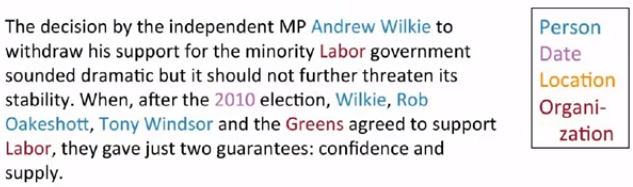

هو الخطوة الأولى نحو استخراج المعلومات التي تسعى إلى تحديد وتصنيف الكيانات المسماة في النص إلى فئات محددة مسبقًا مثل أسماء الأشخاص والمؤسسات والمواقع 
وتعبيرات الأوقات والكميات والقيم النقدية والنسب المئوية
ويمكن أن يساعد في الإجابة على العديد من أسئلة العالم الحقيقي ، مثل

ما هي الشركات التي ورد ذكرها في المقال الإخباري؟

هل تم ذكر منتجات محددة في الشكاوى أو المراجعات؟

هل التغريدة تحتوي على اسم شخص؟ هل تحتوي التغريدة على موقع هذا الشخص؟

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
doc = nlp('Apple to build a Hong Kong factory for $6 million')
doc

Apple to build a Hong Kong factory for $6 million

In [4]:
doc.text

'Apple to build a Hong Kong factory for $6 million'

In [5]:
doc.ents

(Apple, Hong Kong, $6 million)

In [6]:
# to extract tokens
for i in doc:
    print(i.text, end=' | ')

Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 

In [7]:
# to extract only enteties
for i in doc.ents:
    print(i.text, end=' | ')

Apple | Hong Kong | $6 million | 

In [8]:
for i in doc.ents:
    print(i.text) # extract the name
    print(i.label) #  extract the Id
    print(i.label_) # extract the type
    print(str(spacy.explain(i.label_)))
    print(i.start)
    print(i.end)
    print(i.start_char)
    print(i.end_char)
    print('----------------------------------------------')

Apple
383
ORG
Companies, agencies, institutions, etc.
0
1
0
5
----------------------------------------------
Hong Kong
384
GPE
Countries, cities, states
4
6
17
26
----------------------------------------------
$6 million
394
MONEY
Monetary values, including unit
8
11
39
49
----------------------------------------------


In [ ]:
for i in doc.ents:
    print(i.text , ' : ' ,  i.label_ , ' : ' , str(spacy.explain(i.label_)))

Apple  :  ORG  :  Companies, agencies, institutions, etc.
Hong Kong  :  GPE  :  Countries, cities, states
$6 million  :  MONEY  :  Monetary values, including unit


In [21]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
            print('-----------------------------')
    else:
        print('there is no entities found.')    

In [10]:
show_ents(nlp('Hi how are you'))

there is no entities found.


In [22]:
show_ents(nlp('May I go to Jordan, Amman next May to see the Roman amphitheater?'))


Jordan - GPE - Countries, cities, states
-----------------------------
Amman - GPE - Countries, cities, states
-----------------------------
next May - DATE - Absolute or relative dates or periods
-----------------------------
Roman - NORP - Nationalities or religious or political groups
-----------------------------


In [ ]:
show_ents(nlp('Can I please borrow 500 JD from you to buy some Microsoft stock?'))

500 - CARDINAL - Numerals that do not fall under another type
-----------------------------
Microsoft - ORG - Companies, agencies, institutions, etc.
-----------------------------


In [12]:
# to add JD as money
from spacy.tokens import Span
doc =nlp('Can I please borrow 500 JD from you to buy some Microsoft stock?')

MONEY  = doc.vocab.strings[u'MONEY']  
new_ent = Span(doc, 5, 6, label=MONEY)
doc.ents = list(doc.ents) + [new_ent]

In [13]:
show_ents(doc)

500 - CARDINAL - Numerals that do not fall under another type
-----------------------------
JD - MONEY - Monetary values, including unit
-----------------------------
Microsoft - ORG - Companies, agencies, institutions, etc.
-----------------------------


In [14]:
show_ents(nlp('CPRO to build a U.K. factory for $6 million'))

U.K. - GPE - Countries, cities, states
-----------------------------
$6 million - MONEY - Monetary values, including unit
-----------------------------


In [15]:
# to add CPRO as ORG
from spacy.tokens import Span
doc =nlp('CPRO to build a U.K. factory for $6 million')

ORG  = doc.vocab.strings[u'ORG']  
new_ent = Span(doc, 0, 1, label=ORG)
doc.ents = list(doc.ents) + [new_ent]

show_ents(doc)

CPRO - ORG - Companies, agencies, institutions, etc.
-----------------------------
U.K. - GPE - Countries, cities, states
-----------------------------
$6 million - MONEY - Monetary values, including unit
-----------------------------


In [36]:
from importlib.util import decode_source
import spacy
nlp = spacy.load('en_core_web_sm')
doc1 = nlp(u'شركة مرسيدس في الاردن قامت بالاستحواذ علي شركة تويوتا مقابل 5 مليون دولار')


print(doc1.ents)
for i in doc1.ents:
  print(i.text)
  print(i.label)
  print(i.label_)
  print(str(spacy.explain(i.label_)))
  print(i.start)
  print(i.end)
  print(i.start_char)
  print(i.end_char)
  print('----------------------------------------------')

(شركة مرسيدس في الاردن قامت, 5)
شركة مرسيدس في الاردن قامت
383
ORG
Companies, agencies, institutions, etc.
0
5
0
26
----------------------------------------------
5
397
CARDINAL
Numerals that do not fall under another type
10
11
60
61
----------------------------------------------
